In [2]:
import sys
sys.path.append('../')

In [3]:
import numpy as np
from utils.plot import *
import os
import time
import sys
from FuBIF import ExtendedIsolationForest as EIF
import numpy as np
import pandas as pd
from utils.datasets import Dataset
from sklearn.metrics import average_precision_score
from tqdm import tqdm

from split_functions_optimized import *
import FuBIF

  

[[9540]]


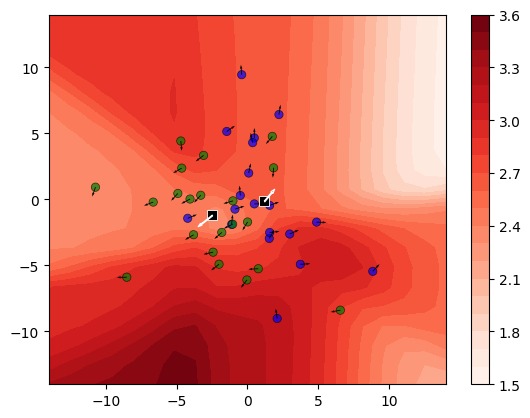

In [27]:


resolution = 20
x_min,x_max = -10,10
y_min,y_max = -10,10
x = np.linspace(x_min-0.2*(x_max-x_min), x_max+0.2*(x_max-x_min), resolution)
y = np.linspace(y_min-0.2*(y_max-y_min), y_max+0.2*(y_max-y_min), resolution)
X_grid = np.meshgrid(x, y)
X_grid = np.array(X_grid).reshape(2, -1).T


Y_1 = np.random.randn(20,5)*3
Y_2 = np.random.randn(20,5)*5
Y = np.concatenate([Y_1,Y_2])
parameters = NN_generate_parameters(Y)

print(parameters)

derivative = NN_Jacobian(Y,parameters)[:,:2]
derivative = derivative/np.linalg.norm(derivative,axis=1).reshape(-1,1)
_,_,_,Z = NN_function(X_grid,parameters)
Z = Z.reshape(resolution, resolution)
_,_,_,Y_pred = NN_function(Y,parameters)
treshold = treshold_calculation(Y_pred,False)
derivative = (-1+2*(Y_pred<treshold))*derivative


mean_derivative_left = np.mean(derivative[Y_pred.flatten()<treshold],axis=0)
mean_derivative_right = np.mean(derivative[Y_pred.flatten()>=treshold],axis=0)
mean_left = np.mean(Y[Y_pred.flatten()<treshold],axis=0)
mean_right = np.mean(Y[Y_pred.flatten()>=treshold],axis=0)

plt.contourf(x, y, Z, cmap="Reds", levels=20)
plt.colorbar(cmap="Reds")
plt.scatter(Y[:,0],Y[:,1],color=['green' if x<treshold else "blue" for x in Y_pred],linewidth=0.5,edgecolors='black',alpha = 0.7)
plt.quiver(Y[:,0],Y[:,1],derivative[:,0],derivative[:,1],color='black',width=0.002,scale = 40)
plt.scatter(mean_left[0],mean_left[1],color='black',edgecolors='white',linewidth=0.6, marker='s',s=50)
plt.quiver(mean_left[0],mean_left[1],mean_derivative_left[0],mean_derivative_left[1],color='black',width=0.001*(len(Y_pred)/sum(Y_pred<treshold)),scale = 20,alpha=1,edgecolor='white', linewidth=0.9)
plt.scatter(mean_right[0],mean_right[1],color='black',edgecolors='white',linewidth=0.6, marker='s',s=50)
plt.quiver(mean_right[0],mean_right[1],mean_derivative_right[0],mean_derivative_right[1],color='black',width=0.001*(len(Y_pred)/sum(Y_pred>=treshold)),scale = 20,alpha=1,edgecolor='white', linewidth=0.9)
plt.contour(x, y, Z, colors = "black", linewidths=2, levels=[treshold],linestyles='-')
plt.xlim(x_min-0.2*(x_max-x_min), x_max+0.2*(x_max-x_min))
plt.ylim(y_min-0.2*(y_max-y_min), y_max+0.2*(y_max-y_min))
plt.savefig(f"../results/plots/interpretation_cmap/NN_random_trial_4_opt.png")
plt.show()


In [9]:

mean_derivative_left

array([0.9047619])

In [10]:
derivative.shape

(60, 1)

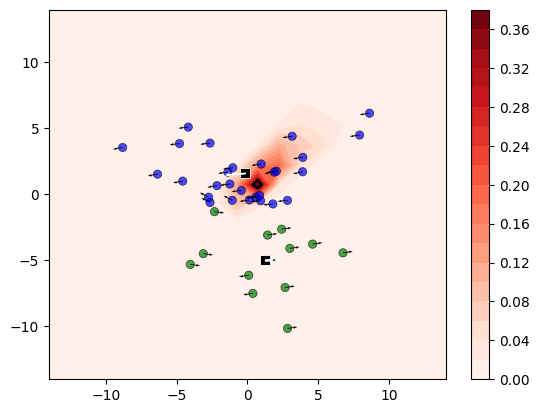

In [ ]:
(Y_pred<treshold).shape

(40, 1)

In [ ]:
os.listdir('../data/real/') + os.listdir('../data/syn/')

['glass.csv',
 'pima.mat',
 'wine.mat',
 'cardio.mat',
 'pendigits.mat',
 'breastw.mat',
 'annthyroid.mat',
 'ionosphere.mat',
 'Xaxis.csv',
 'bisect_3d.csv']